# Bidirectional Dijkstra

Tenemos ahora un grafo y buscamos la distancia minima entre un source s y un target t. <br> 
No usamos simplemente Dijkstra porque si hay muchos ejes, tardar'ia mucho tiempo en progresar desde s hasta t.  <br>
Porque el Dijkstra va creciendo el circulo de nodos visitados  a partir de s, pero toma mucho tiempo en llegar a t. <br> <br>
Sin embargo, podemos ir explorando los nodos cercanos a s con un dijktra y al mismo tiempo ir investigando los nodos cercanos a t tambien. Luego, vemos cuando chocan los dos circulos de exploraci'on y los unimos. <br>
Nota: Para explorar los nodos cercanos a t hay que ir viajando los ejes al rev'es  para que luego al ir de s a t tenga sentido el orden.
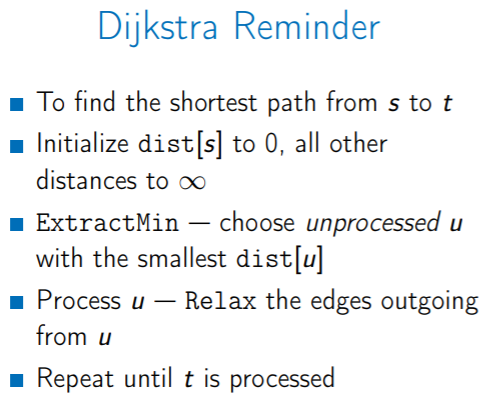

###### Grafo Reverso:
Dado un grafo G, el grafo reverso G^R tiene los mismos ejes con los mismos pesos pero en direccion contraria.
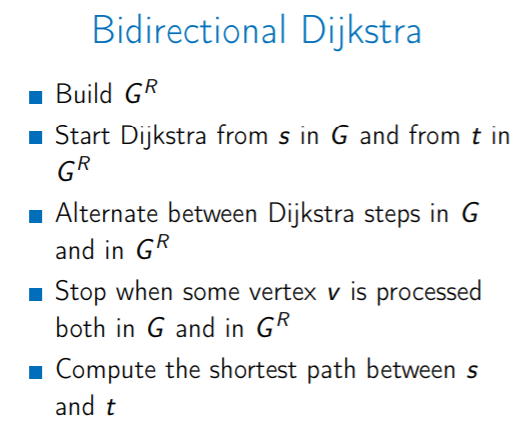

Prueba de Correcci'on (Lema): Sea v el primer vertice que ha sido explorado tanto en G como en G^R. Sea distancia dist[u] la distancia en la direccion directa (de s a u) Y dist^R[u] en la direccion contrarai G^R (de t hasta u). <br> 
El lema dice que si v ha sido procesado en G y en G^R, entonces el camino mas corto de s a t pasa por un nodo u que ha diso procesado por G o por G^R o por ambos y d(s,t) = dist(u) + dist^R(u)

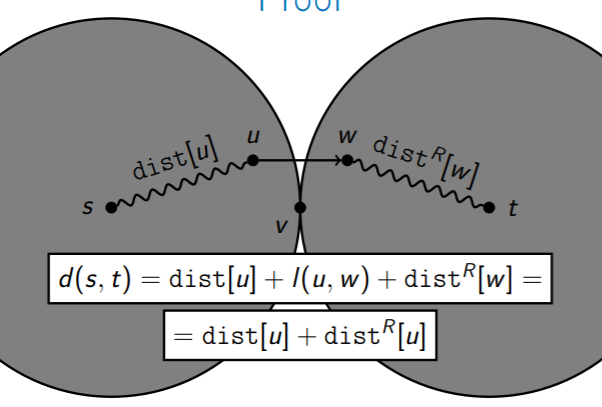

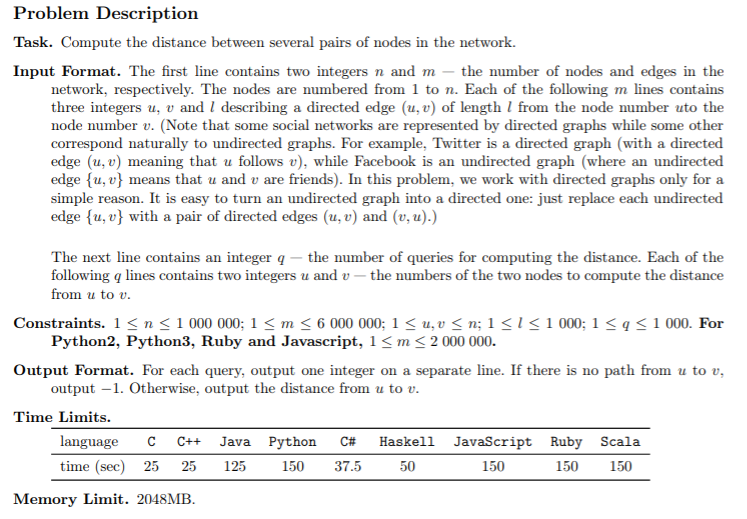

# Bidirectional Dijkstra, multiple querys rapido (pero mucha memoria)

In [13]:
''' Bidirectional dijkstra (con lista de adyacencia )'''
import numpy as np
from math import *
import sys, threading
sys.setrecursionlimit(10**9) # max depth of recursion
threading.stack_size(2**27) 
import queue




class nodos:
    #cada nodo tiene sus conexiones y su indice
    #tipo es para especificar si se trata de un elemento del grafo o del grafo_r 
    #y as'i escoger la funcion lt correspondeinte
    def __init__(self, ind, conex, tipo):
        self.conex = conex
        self.ind = ind
        self.tipo = tipo

        
    #El m\'etodo lt define cual sera la funcion less than al comparar
    #dos objetos de la clasr (para que al usar funciones como min, max,
    #sort, el programa sepa que criterio de less than usar.
    #dice que un nodo es menot que otro si la distancia dist es menor

    def __lt__(self, other):
        if self.tipo == 0:
            return dist[self.ind] < dist[other.ind]
        else:
            return dist_r[self.ind] < dist_r[other.ind]



# tomamos los numeros n y m del input
n , m = [int(x) for x in input().split()]

# luego, nos dan los m ejes direccionados  con los pesos
#definimos el array de los nodos con conexiones por ahora vacias y el grafo inverso
# con las conexiones tambien vacias
grafo = [nodos(i,[],0) for i in range(n)]
grafo_r = [nodos(i,[],1) for i in range(n)]


#para cada entrada de los ejes
for i in range(m):
    p , q , c = [int(x) for x in input().split()]
    #creamos una conexion de p a q en el grafo de ida y con peso c. 
    #Es decir, las conexiones contenienen un array de dos elementos con la direccion a la que 
    #conectan y el peso.
    #el grafo inverso tiene las conexiones al rev'es. 
    grafo[p-1].conex.append([q-1,c])
    grafo_r[q-1].conex.append([p-1,c])
    

#dado un grafo y su grafo inverso, y el indice inicial y final, va a dar el camino y distancia
def bidij(grafo,grafo_r,n, princ, fin):
    
    #creamos los arrays de dist, prev, vis y sus inversos
    #dist tiene la distancia desde el eje princ (o fin si es un inverso)
    #vis se prende cuando estudiamos el nodo en cuestion. 
    # prev tiene el nodo anterior en el camino
    global dist
    dist = n*[np.inf]
    global prev
    prev = n*[None]
    global vis
    vis = n*[0]
    global dist_r
    dist_r = n*[np.inf]
    global prev_r
    prev_r = n*[None]
    global vis_r
    vis_r = n*[0]
    
    #en el grafo de ida el princ tiene distancia 0, en el inverso, el fin tiene distancia 0
    dist[princ] = 0
    dist_r[fin] = 0
    
    #princ est'a visitado en la ida y fin en el inverso
    vis[princ] = 1
    vis_r[fin] = 1
    
    #el prev de princ es princ en la ida y el de fin es fin en el inverso
    prev[princ] = princ
    prev_r[fin] = fin
    
    
    #si princ == fin, el resultado es 0 y no hay que hacer nada
    if princ == fin:
        return(0)
    
    
    #creamos el priority queue del camino de ida y la del camino inverso
    pq = queue.PriorityQueue()
    pq_r = queue.PriorityQueue()
    
    
    #mu es nuestra estimacion de la distancia entre princ y fin, que al principio es infinita obvio.
    mu = np.inf
    
    
    #ponemos el nodo desde el que empezamos en el camino directo y en el inverso.
    #en pq ponemos el nodo, no el indice. 
    pq.put(grafo[princ])
    pq_r.put(grafo_r[fin])
    #pq siempre va a ordenar de tal forma que tiene hasta arriba el nodo con menor distancia
    
    
    while not pq.empty() or not pq_r.empty():
        #mientras haya elementos por visitar:
        
        
        #sacamos el elemento minimo (el de menor distancia)
        #tanto del pq como del pq_r
        # que es el que sabemos que su distancia ya est'a fija seg'un el algoritmo.
        #pues no se puede llegar a el de forma que la distancia disminuya mas. 
        u = pq.get()
        u_r = pq_r.get()
        # lo hacemos tanto en el camino directo como en el inverso.
        
        #marcamos que u ya est'a visitado en graf
        #y que u_r est'a visitado en graf_r
        #es decir, se marcan cuando ya tenemos confirmada us distancia y estamos a punto de investi
        #garlos
        
        vis[u.ind] = 1
        vis_r[u_r.ind] = 1


        # vamos a ir recorriendo las conexiones de u
        for i in range(len(u.conex)):
            
            # vamos viendo las conexiones de u.
            #v es el indice del nodo al que u est'a conectado
            v = u.conex[i][0]
            

            #si la distancia actual que tiene el nodo v es mayor que la distancia que 
            #tendria si pasamos por u y le sumamos el costo de ir desde u hasta v,
            if dist[v] > dist[u.ind] + u.conex[i][1]:
            #recordar que u.conex[i][1] tiene el costo de ir desde u hasta el i-esimo nodo
                
                #entonces, relajamos la distancia de v, y marcamos que se lleg'o a v desde u.ind
                dist[v] = dist[u.ind] + u.conex[i][1]
                prev[v] = u.ind
                # y ponemos este vertice en el queue para revistalo despues (si no ha sido revisado)
                #creo que no tiene sentido, porque si algo ya fue visitado es imposible que 
                # su distancia se pueda relajar, porque ya est'a en su mejor distancia
                if vis[v] == 0:
                    pq.put(grafo[v])
                    vis[v] = 1
            
            # si este nodo v fue visitado en el camino inverso, tenemos una primera conexion entre
            # el inverso y el camino original, por lo que tenemos una primera estimacion para mu
            #vemos si es mejor que alguna otra que tengamos y la guarda,os
            if vis_r[v] == 1:
                if dist[u.ind] + u.conex[i][1] + dist_r[v] < mu:
                    mu = dist[u.ind] + u.conex[i][1] + dist_r[v]
                    #guarfamos tambien la conexxion que se hizo
                    mejorconex=[u.ind,v]
        
        #hacemos lo mismo para el camino inverso.
        for i in range(len(u_r.conex)):
            v = u_r.conex[i][0]
            
            
            if dist_r[v] > dist_r[u_r.ind] + u_r.conex[i][1]:
                
                dist_r[v] = dist_r[u_r.ind] + u_r.conex[i][1]
                prev_r[v] = u_r.ind
                
                if vis_r[v] == 0:
                    pq_r.put(grafo_r[v])
                    vis_r[v]= 1
                
                
            if vis[v] == 1:
                if dist_r[u_r.ind] + u_r.conex[i][1] + dist[v] < mu:
                    mu = dist_r[u_r.ind] + u_r.conex[i][1] + dist[v]
                    mejorconex=[v,u_r.ind]
        
        
        #si el u que acabamos de visitar tiene un indice que ya fue visitado por el camino de regreso
        #significa que el camino de ida y de vuelta ya intersectaron
        if vis_r[u.ind] == 1 or vis[u_r.ind] == 1:
            #return(mu)
            return(shortestpath(princ,fin,mejorconex,mu))
            break

    return(-1)


def shortestpath(princ,fin,mejorconex,mu):
    path = []
    lastida = mejorconex[0]    

    
    while lastida != princ:
        path.append(lastida)       
        lastida = prev[lastida]
    path.append(princ)
    path.reverse()
    
    
    
    lastreg = mejorconex[1]
    path.append(lastreg)
    
    while lastreg != fin:
        lastreg = prev_r[lastreg]
        path.append(lastreg)
    
    return(mu,path)

#princ = 0
#fin = 4
#print(bidij(grafo,grafo_r,princ,fin))

#q es el nunmero de queries
q = int(input())

for m in range(q):
    princ, fin = [int(x)-1 for x in input().split()]
    res = bidij(grafo,grafo_r,n,princ,fin)
    print("costo y camino:" res)
    




5 9
1 2 4
1 3 2
2 3 2
3 2 1
2 4 2
3 5 4
5 4 1
2 5 3
3 4 4
5
1 5
(6, [0, 2, 4])
1 4
(5, [0, 2, 1, 3])
4 1
-1
1 2
(3, [0, 2, 1])
5 4
(1, [4, 3])


# Bidirectional, copiando los grafos en cada query, mucha memoria, pero rapido

In [3]:

''' Bidirectional dijkstra (con lista de adyacencia )'''
import numpy as np
from math import *
import sys, threading
sys.setrecursionlimit(10**9) # max depth of recursion
threading.stack_size(2**27) 
import queue
import copy

class nodos:
    #cada nodo tiene sus conexiones y tiene una distancia inicializada en infinito
    #tambien tienen la propiedad de previo, que es el vector anterior en el camino
    # y el self.vis dice si fue visitado o no.
    def __init__(self, ind, conex):
        self.conex = conex
        self.ind = ind
        self.dist = inf
        self.vis = 0
        self.prev = None
        
    #El m\'etodo lt define cual sera la funcion less than al comparar
    #dos objetos de la clasr (para que al usar funciones como min, max,
    #sort, el programa sepa que criterio de less than usar.
    #dice que un nodo es menot que otro si la distancia dist es menor

    def __lt__(self, other):
        return self.dist < other.dist



# tomamos los numeros n y m del input
n , m = [int(x) for x in input().split()]

# luego, nos dan los m ejes direccionados  con los pesos
#definimos el array de los nodos con conexiones por ahora vacias y el grafo inverso
# con las conexiones tambien vacias
grafo_o = [nodos(i,[]) for i in range(n)]
grafo_r_o = [nodos(i,[]) for i in range(n)]


#para cada entrada de los ejes
for i in range(m):
    p , q , c = [int(x) for x in input().split()]
    #creamos una conexion de p a q en el grafo de ida y con peso c. 
    #Es decir, las conexiones contenienen un array de dos elementos con la direccion a la que 
    #conectan y el peso.
    #el grafo inverso tiene las conexiones al rev'es. 
    grafo_o[p-1].conex.append([q-1,c])
    grafo_r_o[q-1].conex.append([p-1,c])
    
    
    
    
    
    
#dado un grafo y su grafo inverso, y el indice inicial y final, va a dar el camino y distancia
def bidij(grafo_o,grafo_r_o, princ, fin):
    
    grafo = copy.deepcopy(grafo_o)
    grafo_r = copy.deepcopy(grafo_r_o)
    
    if princ == fin:
        return([0,princ])
    mu = np.inf
    # el primer vertice tiene una distancia 0.
    grafo[princ].dist = 0
    #el primer vertice del camino inverso tambien tiene una distancia 0.
    grafo_r[fin].dist = 0
    

    #creamos una priorityQueue, que es beuna para sacar minimos de una lista
    pq = queue.PriorityQueue()
    #y creamos una pq para el camino inverso.
    pq_r = queue.PriorityQueue()
    
    #ponemos el nodo desde el que empezamos en el camino directo y en el inverso.
    #en pq ponemos el nodo, no el indice. 
    pq.put(grafo[princ])
    pq_r.put(grafo_r[fin])
    
    
    while not pq.empty() and not pq_r.empty():
        #sacamos el elemento minimo (el de menor distancia)
        # que es el que sabemos que su distancia ya est'a fija seg'un el algoritmo.
        u = pq.get()
        u_r = pq_r.get()
        # lo hacemos tanto en el camino directo como en el inverso.
        
        #print("u",u.ind)
        #marcamos que u ya est'a visitado en graf
        #y que u_r est'a visitado en graf_r
        u.vis = 1
        u_r.vis=1


        # vamos a ir recorriendo las conexiones de u
        for i in range(len(u.conex)):
            
            # vamos viendo las conexiones de u.
            #v es el indice del nodo al que u est'a conectado
            v = u.conex[i][0]
            

            #si la distancia actual que tiene el nodo v es mayor que la distancia que 
            #tendria si pasamos por u y le sumamos el costo de ir desde u hasta v,
            if grafo[v].dist > u.dist + u.conex[i][1]:
                
                #entonces, relajamos la distancia de v, y marcamos que se lleg'o a v desde u.ind
                grafo[v].dist = u.dist + u.conex[i][1]
                grafo[v].prev = u.ind
                # y ponemos este vertice en el queue para revistalo despues
                pq.put(grafo[v])
                
            if grafo_r[v].vis == 1:
                if u.dist+ u.conex[i][1] + grafo_r[v].dist < mu:
                    mu =  u.dist+ u.conex[i][1] + grafo_r[v].dist
                    mejorconex=[u.ind,v]
        
        #hacemos lo mismo para el camino inverso.
        for i in range(len(u_r.conex)):
            v = u_r.conex[i][0]
            
            
            if grafo_r[v].dist > u_r.dist + u_r.conex[i][1]:
                
                
                grafo_r[v].dist = u_r.dist + u_r.conex[i][1]
                grafo_r[v].prev = u_r.ind
                
                
                pq_r.put(grafo_r[v])
                
            if grafo[v].vis == 1:
                if u_r.dist+ u_r.conex[i][1] + grafo[v].dist < mu:
                    mu =  u_r.dist+ u_r.conex[i][1] + grafo[v].dist
                    mejorconex=[v,u_r.ind]
        
        
        #si el u que acabamos de visitar tiene un indice que ya fue visitado por el camino de regreso
        #significa que el camino de ida y de vuelta ya intersectaron
        if grafo_r[u.ind].vis == 1:
            return([mu,-1])
            #return(shortestpath(princ,proc,proc_r,fin,mejorconex,mu))
            break

    return([-1,-1])


def shortestpath(princ,proc,proc_r,fin,mejorconex,mu):
    path = []
    lastida = mejorconex[0]    

    
    while lastida != princ:
        path.append(lastida)       
        lastida = grafo[lastida].prev
    path.append(princ)
    path.reverse()
    
    
    
    lastreg = mejorconex[1]
    path.append(lastreg)
    
    while lastreg != fin:
        lastreg = grafo_r[lastreg].prev
        path.append(lastreg)
    
    return(mu,path)

#princ = 0
#fin = 4
#print(bidij(grafo,grafo_r,princ,fin))

#q es el nunmero de queries
q = int(input())

for m in range(q):
    princ, fin = [int(x)-1 for x in input().split()]
    res = bidij(grafo_o,grafo_r_o,princ,fin)
    print(res[0])
    #print(res[1])
    



5 9
1 2 4
1 3 2
2 3 2
3 2 1
2 4 2
3 5 4
5 4 1
2 5 3
3 4 4
1
1 5
6
